In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import thư viện

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, recall_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

In [3]:
# Đọc dữ liệu
st_df = pd.read_csv("/content/drive/MyDrive/Students_Performance/data/Student_performance_data _.csv")

In [4]:

# Xử lý dữ liệu
if "StudentID" in st_df.columns:
    st_df = st_df.drop("StudentID", axis=1)

Khám phá dữ liệu

In [5]:
st_df.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [6]:
st_df['GradeClass'].unique()

array([2., 1., 4., 3., 0.])

<ipython-input-7-27730df2c67c>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Female', 'Male'])


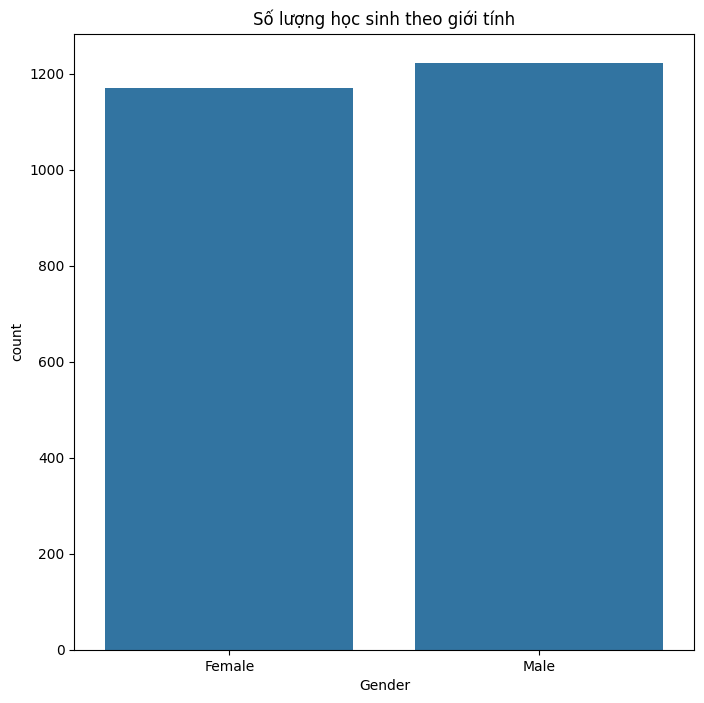

In [7]:
plt.figure(figsize=(8, 8))
ax = sns.countplot(data=st_df, x="Gender")
ax.set_xticklabels(['Female', 'Male'])
plt.title('Số lượng học sinh theo giới tính')
plt.show()

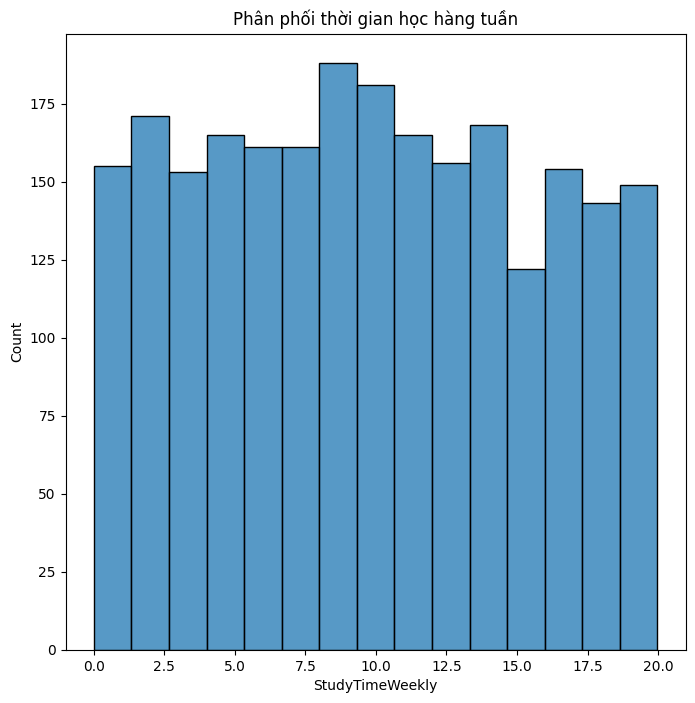

In [8]:
plt.figure(figsize=(8, 8))
sns.histplot(data=st_df, x="StudyTimeWeekly")
plt.title('Phân phối thời gian học hàng tuần')
plt.show()

<ipython-input-9-131f3b67825e>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Female', 'Male'])


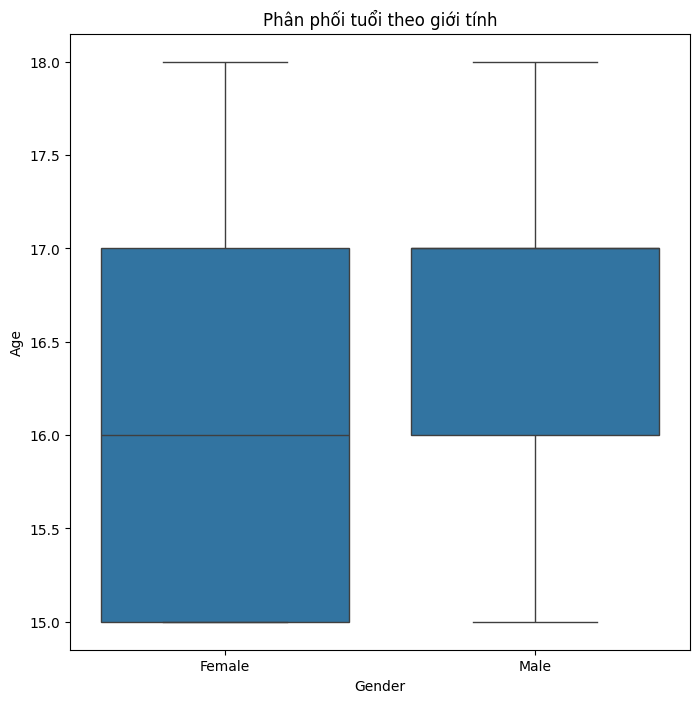

In [9]:
plt.figure(figsize=(8, 8))
ax = sns.boxplot(data=st_df, x="Gender", y="Age")
ax.set_xticklabels(['Female', 'Male'])
plt.title('Phân phối tuổi theo giới tính')
plt.show()

<ipython-input-10-3d1951b32edc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=st_df, x="Ethnicity", palette=["#3498db", "#e74c3c", "#2ecc71", "#9b59b6"])
<ipython-input-10-3d1951b32edc>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Caucasian', 'African American', 'Asian', 'Other'])


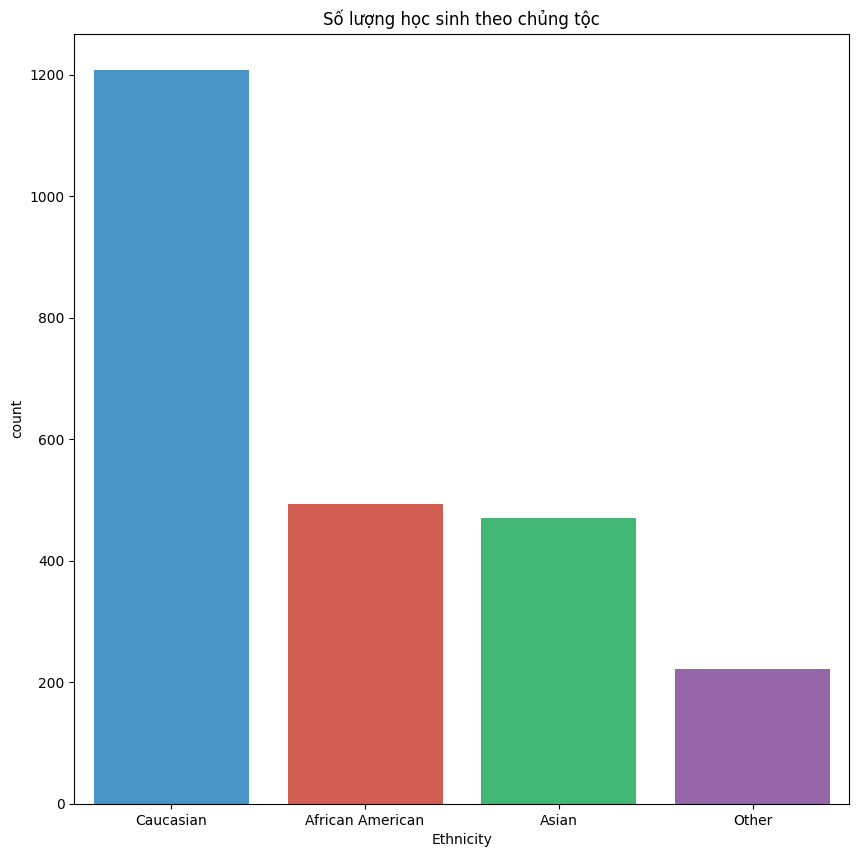

In [10]:
plt.figure(figsize=(10, 10))
ax = sns.countplot(data=st_df, x="Ethnicity", palette=["#3498db", "#e74c3c", "#2ecc71", "#9b59b6"])
ax.set_xticklabels(['Caucasian', 'African American', 'Asian', 'Other'])
plt.title('Số lượng học sinh theo chủng tộc')
plt.show()

<ipython-input-11-5aa30f7b3fec>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Female', 'Male'])


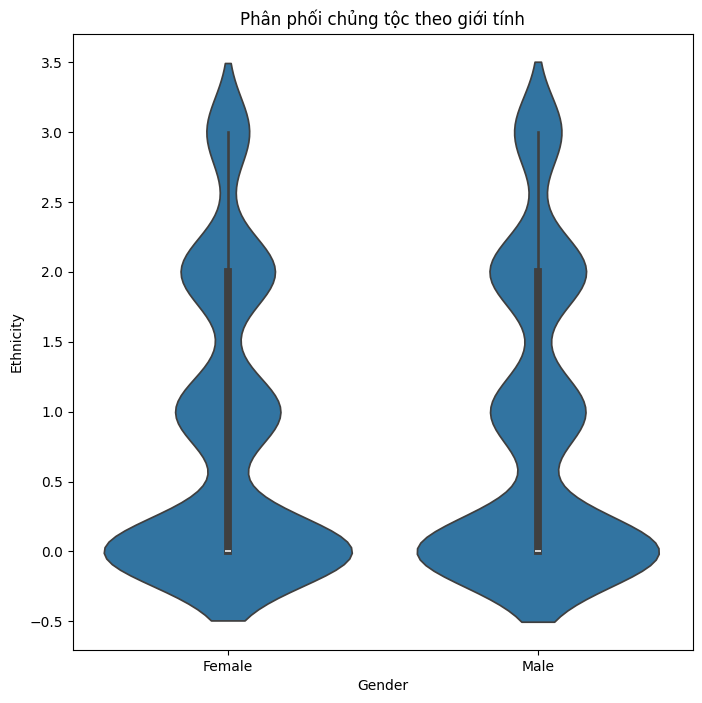

In [11]:
plt.figure(figsize=(8, 8))
ax = sns.violinplot(data=st_df, x="Gender", y="Ethnicity")
ax.set_xticklabels(['Female', 'Male'])
plt.title('Phân phối chủng tộc theo giới tính')
plt.show()

<ipython-input-12-824cb97af1d9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=st_df, x="Ethnicity", y="GradeClass", palette=["#3498db", "#e74c3c", "#2ecc71", "#9b59b6"])


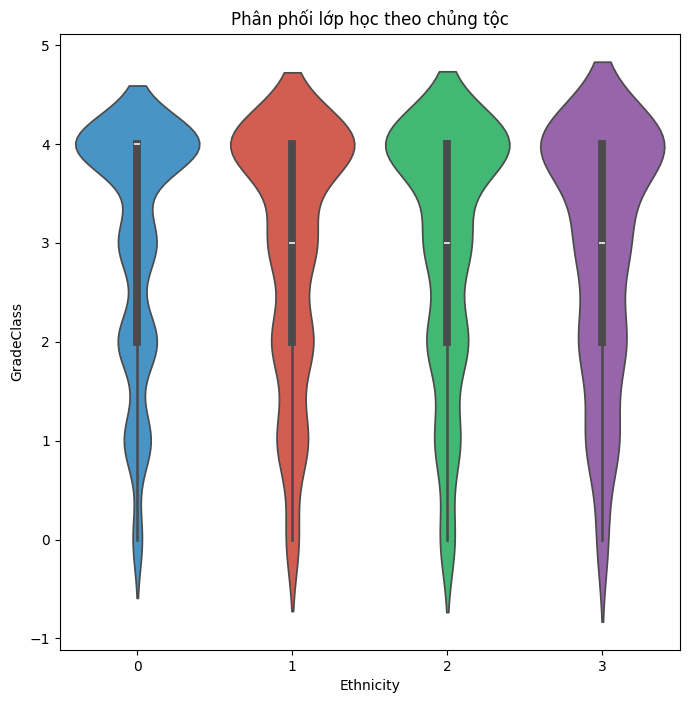

In [12]:
plt.figure(figsize=(8, 8))
sns.violinplot(data=st_df, x="Ethnicity", y="GradeClass", palette=["#3498db", "#e74c3c", "#2ecc71", "#9b59b6"])
plt.title('Phân phối lớp học theo chủng tộc')
plt.show()


<ipython-input-13-23cca0b67509>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=st_df, x="Age", y="StudyTimeWeekly", palette=["#3498db", "#e74c3c", "#2ecc71", "#9b59b6"])


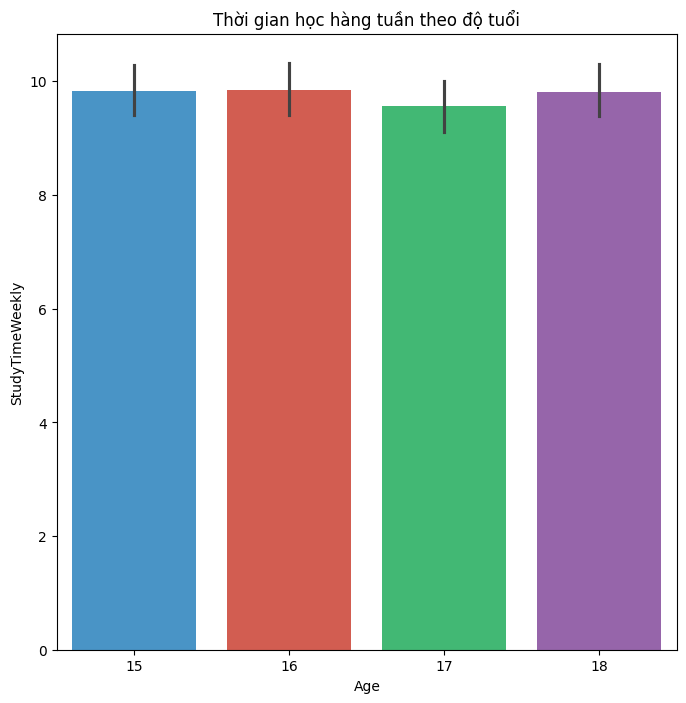

In [13]:
plt.figure(figsize=(8, 8))
sns.barplot(data=st_df, x="Age", y="StudyTimeWeekly", palette=["#3498db", "#e74c3c", "#2ecc71", "#9b59b6"])
plt.title('Thời gian học hàng tuần theo độ tuổi')
plt.show()

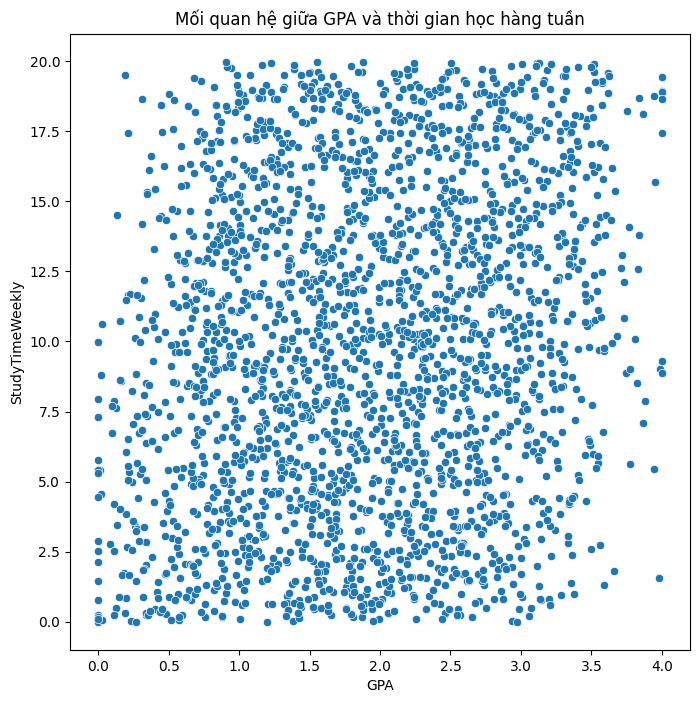

In [14]:

plt.figure(figsize=(8, 8))
sns.scatterplot(data=st_df, x="GPA", y="StudyTimeWeekly")
plt.title('Mối quan hệ giữa GPA và thời gian học hàng tuần')
plt.show()

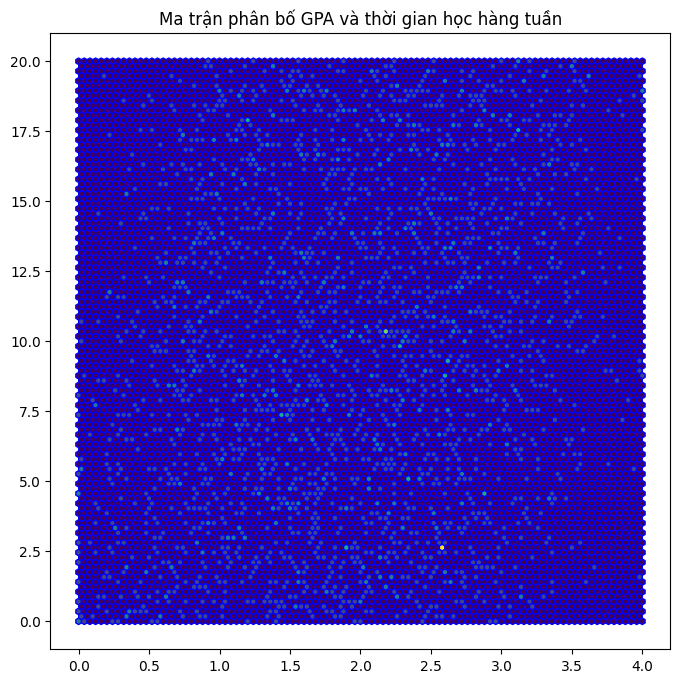

In [15]:
plt.figure(figsize=(8, 8))
plt.hexbin(data=st_df, x="GPA", y="StudyTimeWeekly", color="b")
plt.title('Ma trận phân bố GPA và thời gian học hàng tuần')
plt.show()

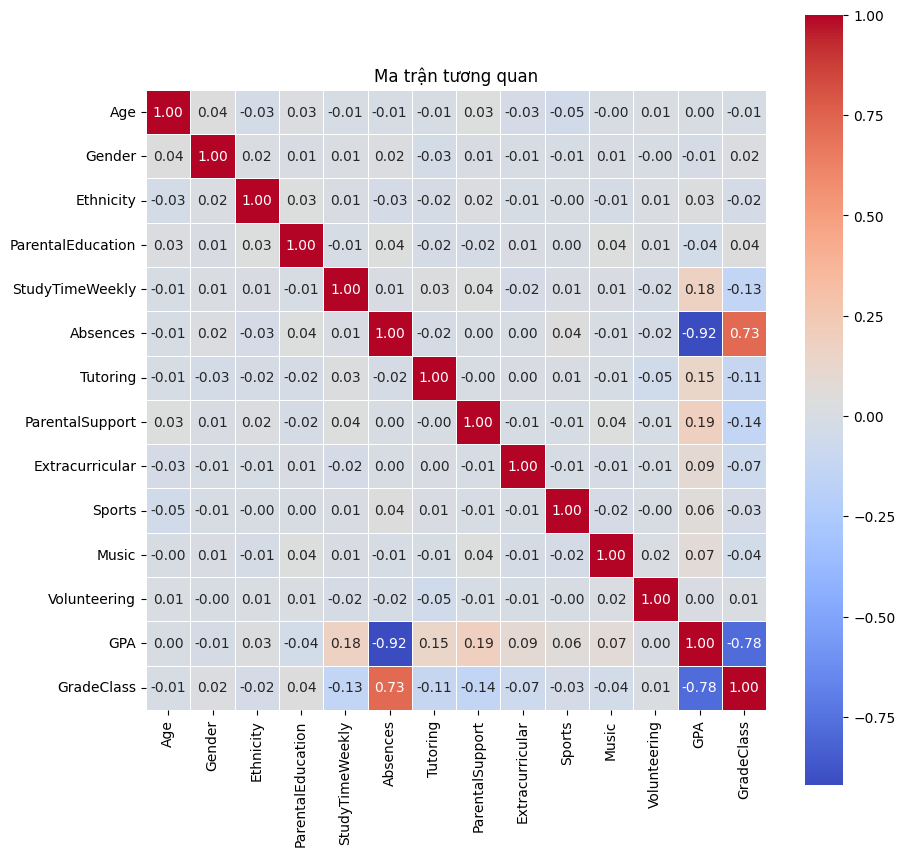

In [16]:
corr_mat = st_df.corr(method="pearson")
plt.figure(figsize=(10, 10))
sns.heatmap(corr_mat, annot=True, linewidths=0.7, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Ma trận tương quan")
plt.show()

Chuẩn Bị Dữ Liệu

In [17]:
x = st_df.drop("GradeClass", axis=1)
y = st_df['GradeClass']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [18]:
y_train_encoded = to_categorical(y_train, num_classes=5)
y_test_encoded = to_categorical(y_test, num_classes=5)

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

Xây Dựng Mô Hình

In [20]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(5, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Huẩn Luyện Mô Hình

In [22]:
history = model.fit(X_train_scaled, y_train_encoded, epochs=20, batch_size=32, validation_split=0.4)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - accuracy: 0.4515 - loss: 1.4755 - val_accuracy: 0.5955 - val_loss: 1.0836
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6555 - loss: 0.9411 - val_accuracy: 0.7179 - val_loss: 0.9124
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8105 - loss: 0.6954 - val_accuracy: 0.7552 - val_loss: 0.7914
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8023 - loss: 0.6854 - val_accuracy: 0.7806 - val_loss: 0.7518
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8546 - loss: 0.5278 - val_accuracy: 0.7716 - val_loss: 0.7402
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8719 - loss: 0.4725 - val_accuracy: 0.7851 - val_loss: 0.7126
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8918 - loss: 0.4457 - val_accuracy: 0.7672 - val_loss: 0.7447
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9046 - loss: 0.3946 - val_accuracy: 0.7761 - val_loss

In [23]:
# Đánh giá mô hình
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_encoded)
print(f'Test loss: {test_loss}, Test accuracy: {test_accuracy}')

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7889 - loss: 0.7587
Test loss: 0.703529953956604, Test accuracy: 0.7980501651763916


In [24]:
# Dự đoán và đánh giá trên tập kiểm tra
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_encoded, axis=1)

print("Classification Report:")
print(classification_report(y_true, y_pred_classes))

print("Confusion Matrix:")
cm = confusion_matrix(y_true, y_pred_classes)
print(cm)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.45      0.53        33
           1       0.67      0.59      0.63        80
           2       0.68      0.79      0.73       121
           3       0.73      0.61      0.67       127
           4       0.90      0.94      0.92       357

    accuracy                           0.80       718
   macro avg       0.72      0.68      0.69       718
weighted avg       0.79      0.80      0.79       718

Confusion Matrix:
[[ 15   6   4   4   4]
 [  9  47  17   2   5]
 [  0  12  96   7   6]
 [  0   3  23  78  23]
 [  0   2   2  16 337]]


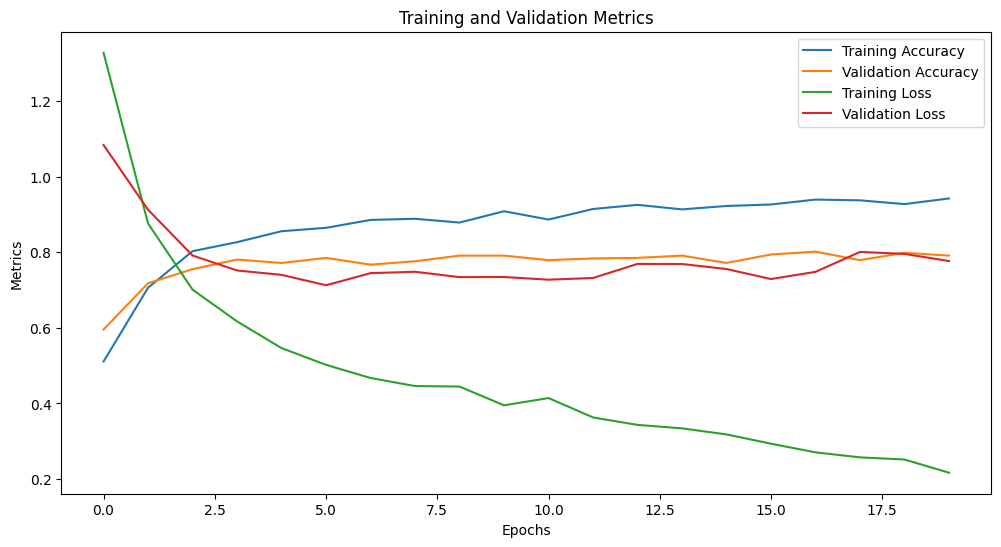

In [25]:
# Đồ thị huấn luyện
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.title('Training and Validation Metrics')
plt.show()